<a href="https://colab.research.google.com/github/rukmals/ColabProject/blob/master/Vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('CSE_DSIntro1_TRAIN.csv')
df.head(7)

Saving CSE_DSIntro1_TRAIN.csv to CSE_DSIntro1_TRAIN.csv


,Id,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_40,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64,Column_65,Column_66,Column_67,Column_68,Column_69,Column_70,Column_71,Column_72,Column_73,Column_74,Column_75,Column_76,Column_77,Category
0,1,77041.50,44471.03389,88955.41342,1602.4632,1787.3628,1571.6466,1294.2972,1664.0964,1756.5462,1016.9478,801.2316,1510.0134,1355.9304,1047.7644,1848.9960,1109.3976,1140.2142,1694.9130,1386.7470,1078.5810,986.1312,523.8822,739.5984,1479.1968,1417.5636,1171.0308,616.3320,955.3146,893.6814,585.5154,770.4150,554.6988,708.7818,1201.8474,924.4980,832.0482,1232.664,862.8648,369.7992,677.9652,431.4324,400.6158,308.1660,277.3494,215.7162,338.9826,184.8996,246.5328,154.0830,123.2664,92.4498,30.8166,61.6332,1834,32,308166,10000,63635.31373,1.527772,0.073608,1.511108,63642.86256,1.527652,0.073507,1.511320,11,23,15,22,2,2021,11,23,15,22,2,2021,0
1,2,77120.00,44516.34682,89046.05288,1573.2480,2128.5120,987.1360,956.2880,1511.5520,1388.1600,1881.7280,1789.1840,1604.0960,1172.2240,1295.6160,1696.6400,832.8960,1419.0080,1326.4640,1449.8560,678.6560,1357.3120,1017.9840,493.5680,1203.0720,616.9600,1141.3760,894.5920,1110.5280,1079.6800,555.2640,647.8080,925.4400,771.2000,1233.9200,586.1120,802.0480,740.352,863.7440,1048.8320,709.5040,401.0240,524.4160,431.8720,308.4800,185.0880,277.6320,215.9360,339.3280,154.2400,123.3920,92.5440,30.8480,61.6960,2167,32,308480,10000,63656.80693,1.527630,0.073701,1.511097,63649.22304,1.527373,0.073794,1.511169,11,23,15,22,2,2021,11,23,15,22,2,2021,0
2,3,77120.00,44516.34682,89046.05288,1789.1840,1511.5520,1665.7920,1326.4640,1357.3120,1634.9440,1388.1600,1573.2480,678.6560,277.6320,1604.0960,1172.2240,1758.3360,956.2880,802.0480,1233.9200,1079.6800,308.4800,1419.0080,832.8960,987.1360,740.3520,1912.5760,1141.3760,925.4400,709.5040,431.8720,1264.7680,771.2000,1542.4000,894.5920,555.2640,1017.9840,863.744,586.1120,616.9600,1048.8320,493.5680,524.4160,370.1760,462.7200,647.8080,185.0880,215.9360,154.2400,246.7840,123.3920,92.5440,30.8480,61.6960,2568,32,308480,10000,63648.70842,1.527451,0.073684,1.511247,63658.20567,1.527631,0.073571,1.511256,11,23,15,22,2,2021,11,23,15,22,2,2021,0
3,4,77117.50,44514.90373,89043.16628,1511.5030,1789.1260,1233.8800,1881.6670,1418.9620,2159.2900,1388.1150,1110.4920,1141.3390,987.1040,709.4810,1573.1970,1480.6560,1264.7270,431.8580,1326.4210,740.3280,401.0110,1172.1860,1203.0330,1079.6450,894.5630,1295.5740,802.0220,678.6340,925.4100,339.3170,616.9400,1048.7980,863.7160,832.8690,586.0930,308.4700,1017.951,771.1750,647.7870,524.3990,462.7050,493.5520,555.2460,215.9290,277.6230,185.0820,370.1640,154.2350,246.7760,123.3880,92.5410,30.8470,61.6940,2405,32,308470,10000,63646.45414,1.527544,0.073631,1.511245,63655.53620,1.527550,0.073430,1.511489,11,23,16,22,2,2021,11,23,16,22,2,2021,0
4,5,77120.00,44516.34682,89046.05288,1974.2720,1696.6400,832.8960,1820.0320,1758.3360,1727.4880,1295.6160,1388.1600,1789.1840,1326.4640,1634.9440,2190.2080,1079.6800,678.6560,1480.7040,1912.5760,246.7840,1850.8800,2035.9680,2344.4480,1542.4000,493.5680,1233.9200,1203.0720,1017.9840,1665.7920,185.0880,1172.2240,215.9360,987.1360,616.9600,1141.3760,462.7200,894.592,524.4160,740.3520,802.0480,771.2000,277.6320,1048.8320,925.4400,709.5040,586.1120,647.8080,308.4800,123.3920,339.3280,92.5440,30.8480,61.6960,3149,32,308480,10000,63653.44768,1.527329,0.073626,1.511409,63637.01387,1.527490,0.073543,1.511393,11,23,16,22,2,2021,11,23,16,22,2,2021,0
5,6,77122.

In [ ]:
df.shape

(2500, 79)

In [ ]:
df=df.dropna(axis=1)

In [ ]:
df.shape

(2500, 79)

In [ ]:
df['Category'].value_counts()

0    1710
1     790
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


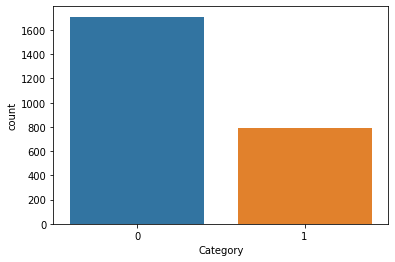

In [ ]:
#Visualize the count
sns.countplot(df['Category'], label='count')

In [ ]:
#Check the data type
df.dtypes

Id             int64
Column_1     float64
Column_2     float64
Column_3     float64
Column_4     float64
              ...   
Column_74      int64
Column_75      int64
Column_76      int64
Column_77      int64
Category       int64
Length: 79, dtype: object

In [ ]:
#Encode the data categories data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,78] = labelencoder_Y.fit_transform(df.iloc[:,78].values)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

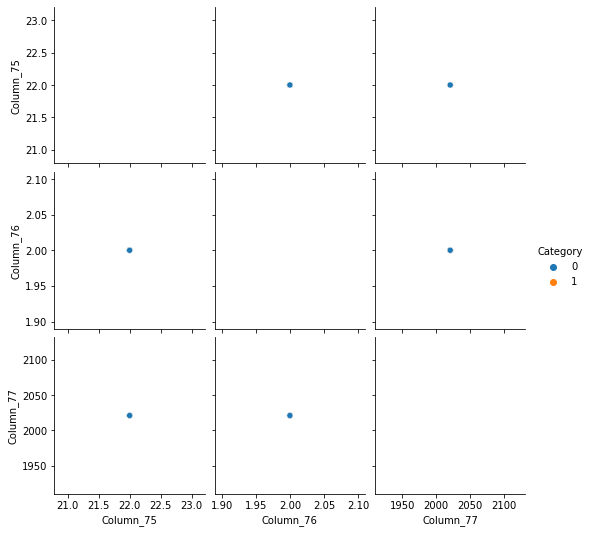

In [ ]:
#Create a pair plot
sns.pairplot(df.iloc[:,75:79], hue='Category')

In [ ]:
#Get the correelation of the columns
df.iloc[:,68:79].corr()

,Column_68,Column_69,Column_70,Column_71,Column_72,Column_73,Column_74,Column_75,Column_76,Column_77,Category
Column_68,1.000000,NaN,NaN,NaN,NaN,-0.067458,0.999950,NaN,NaN,NaN,0.019966
Column_69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column_70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column_71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column_72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column_73,-0.067458,NaN,NaN,NaN,NaN,1.000000,-0.067604,NaN,NaN,NaN,0.038299
Column_74,0.999950,NaN,NaN,NaN,NaN,-0.067604,1.000000,NaN,NaN,NaN,0.020471
Column_75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column_76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column_77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


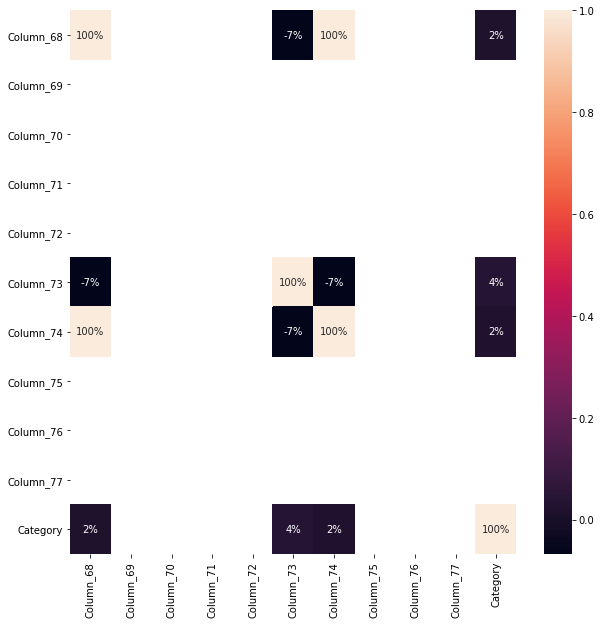

In [ ]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,68:79].corr(), annot=True , fmt='.0%')

In [ ]:
 X = df.iloc[:,1:78].values
 Y = df.iloc[:,78].values

In [ ]:
#Split the data set in to 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)

In [ ]:
#Scale the data (Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#Create a function for the models
def models(X_train,Y_train):
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)

  #Print the modles accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:' , log.score(X_train,Y_train))
  print('[1]Decision Tree Training Accuracy:' , tree.score(X_train,Y_train))
  print('[2]Random Forest Training Accuracy:' , forest.score(X_train,Y_train))

  return log,tree, forest

In [ ]:
#Getting all of the models
models = models(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic Regression Training Accuracy: 0.7061333333333333
[1]Decision Tree Training Accuracy: 1.0
[2]Random Forest Training Accuracy: 0.9776


In [ ]:
#Test models accuracy on test data on confution matrix
from sklearn.metrics import confusion_matrix

for i in range( len(models) ):
  print('Model',i)
  cm  =confusion_matrix(Y_test,models[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP+TN)/(TP+TN+FN+FP))

Model 0
[[337 101]
 [113  74]]
Testing Accuracy = 0.6576
Model 1
[[280 158]
 [111  76]]
Testing Accuracy = 0.5696
Model 2
[[353  85]
 [127  60]]
Testing Accuracy = 0.6608


In [ ]:
#Show another way to get matrics of the modles
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(models) ):
  print('Model',i)
  print( classification_report(Y_test,models[i].predict(X_test)))
  print (accuracy_score(Y_test,models[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       438
           1       0.42      0.40      0.41       187

    accuracy                           0.66       625
   macro avg       0.59      0.58      0.58       625
weighted avg       0.65      0.66      0.65       625

0.6576

Model 1
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       438
           1       0.32      0.41      0.36       187

    accuracy                           0.57       625
   macro avg       0.52      0.52      0.52       625
weighted avg       0.60      0.57      0.58       625

0.5696

Model 2
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       438
           1       0.41      0.32      0.36       187

    accuracy                           0.66       625
   macro avg       0.57      0.56      0.57       625
weighted avg       0.64      0.66 

In [ ]:
#Print the prediction of Random Forest Classifier MOdel
pred = models[2].predict(X_test)
print(pred)
print()
print(Y_test)

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 

In [ ]:
  from sklearn.metrics import confusion_matrix
  
  cm  =confusion_matrix(Y_test,models[2].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print('Testing Accuracy =', (TP+TN)/(TP+TN+FN+FP))

Testing Accuracy = 0.6608
